In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [94]:
iris = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\ML\Datasets\IRIS.csv')

In [95]:
iris.shape

(150, 5)

In [96]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [97]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [98]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [99]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [100]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

<Axes: xlabel='species', ylabel='count'>

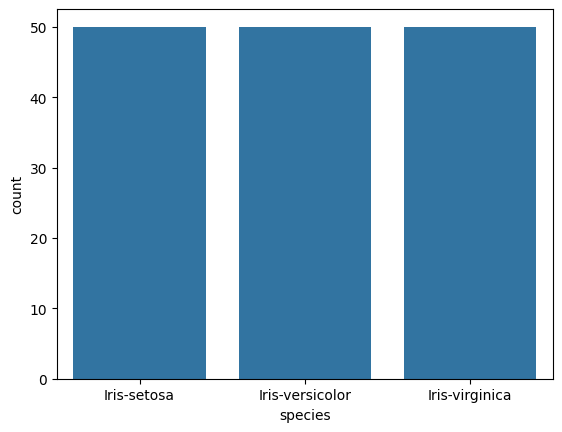

In [101]:
sns.countplot(x='species', data = iris)

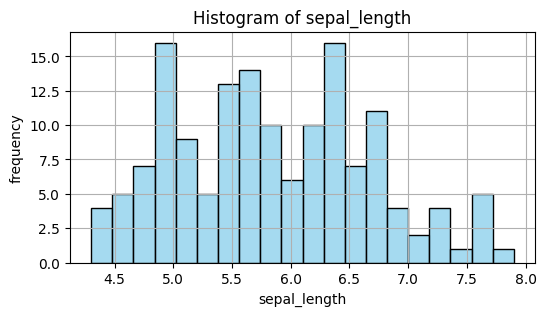

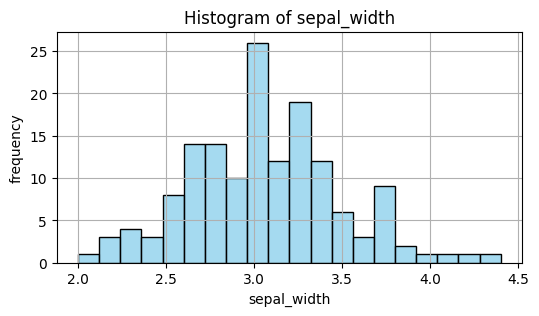

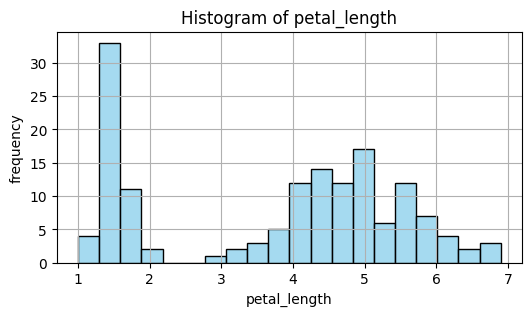

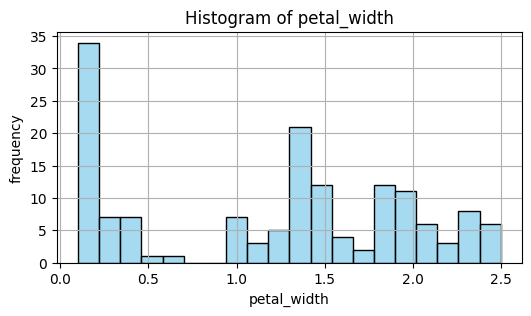

In [102]:
numeric_columns = iris.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(6,3))
    sns.histplot(iris[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.grid(True)
    plt.show

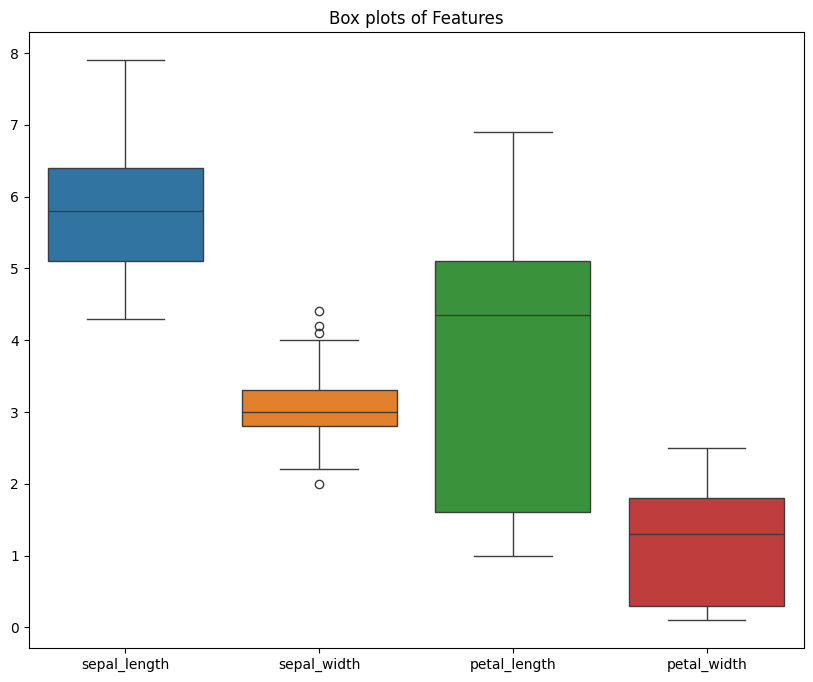

In [103]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris)
plt.title('Box plots of Features')
plt.show()

When we consider the boxplot of sepal_width the individual circles represent the outliers.

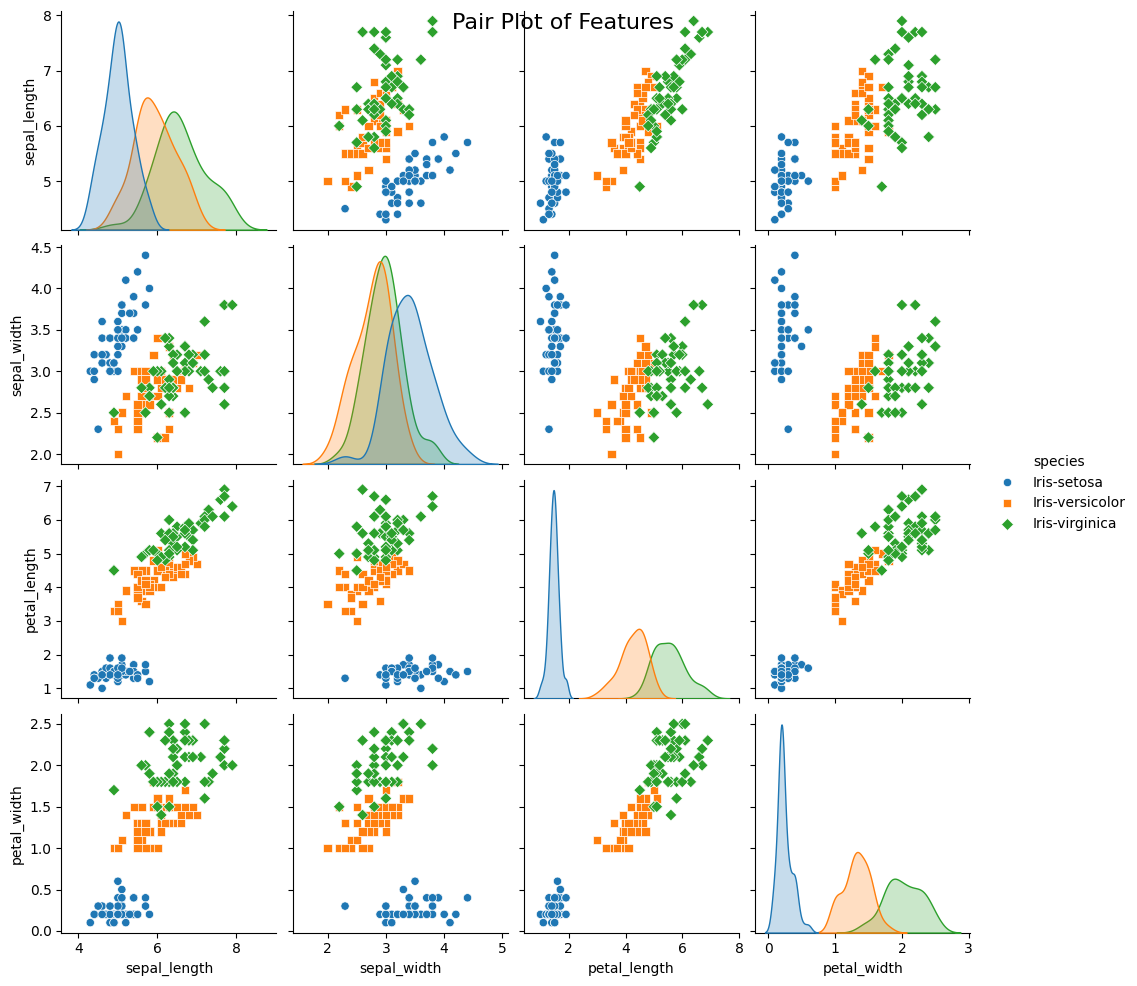

In [104]:
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Features', size=16)
plt.show()

**Insights**

**1.** petal_length and petal_width are the most useful features to identify various flower types.

**2.** while setosa can be easily identified(linearly seeparable), virnica and versicolor have some overlap(almost linearly seperable)

**3.** we can find lines and if-else conditions to build a simple model to classify.

**Interpretation:**

**1.Sepal Length:**

**Unimodal:** For most species, the sepal length distribution is unimodal.

**Species Comparison:** The distributions overlap, but each species has a different central tendency.


**2.Sepal Width:**

**Unimodal with Overlap:** Sepal width shows some overlap between species, indicating that this feature alone may not be very discriminative.

**Skewness:** Some species might show slight skewness.

**3.Petal Length:**

**Distinct Peaks:** The petal length distributions are more distinct between species, especially for Iris-setosa, which shows a separate peak.

**Minimal Overlap:** Less overlap compared to sepal features, indicating this feature is good for species differentiation.

**4.Petal Width:**

**Very Distinct Peaks:** Similar to petal length, petal width shows clear separation between species.

**Species Separation:** Almost no overlap for Iris-setosa, making it an excellent feature for distinguishing this species from the others.

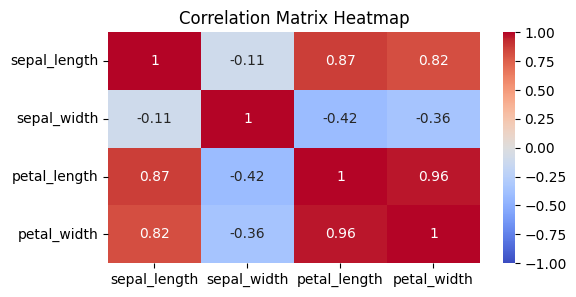

In [105]:
# Select numerical columns
numerical_columns = iris.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


Strong correlation between petal length and petal width.
Sepal length and petal length also show a notable correlation.

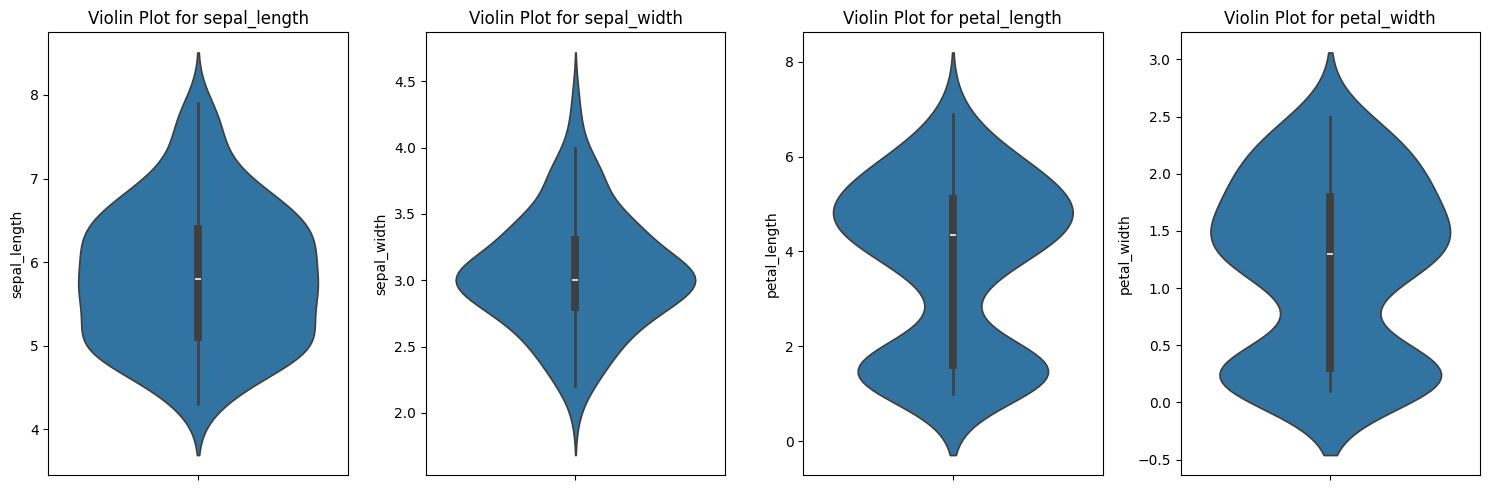

In [106]:
# Select numerical columns
numeric_columns = iris.select_dtypes(include=['int64', 'float64']).columns

# Create violin plots for each numerical column
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.violinplot(y=iris[column])
    plt.title(f'Violin Plot for {column}')

plt.tight_layout()
plt.show()

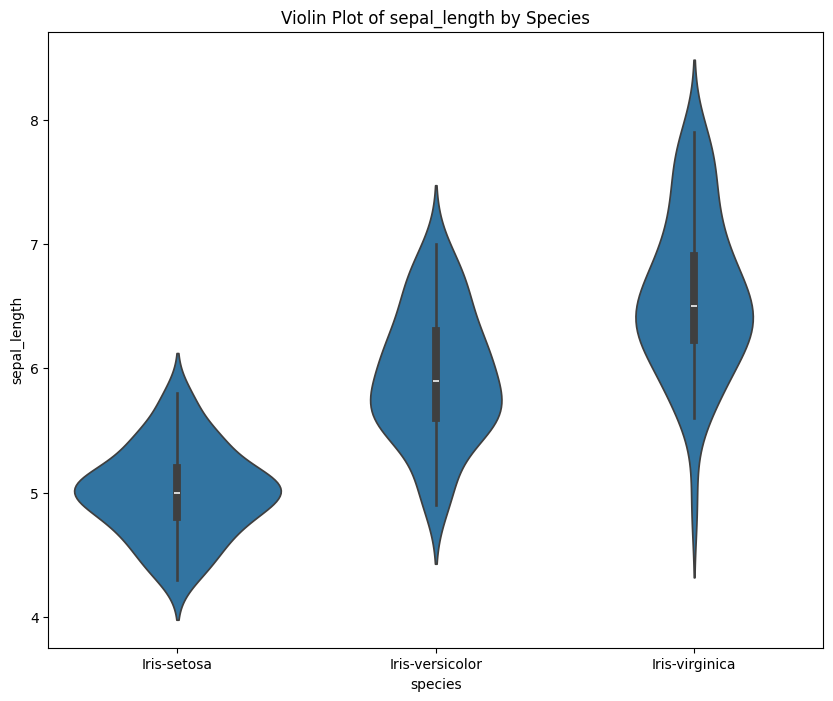

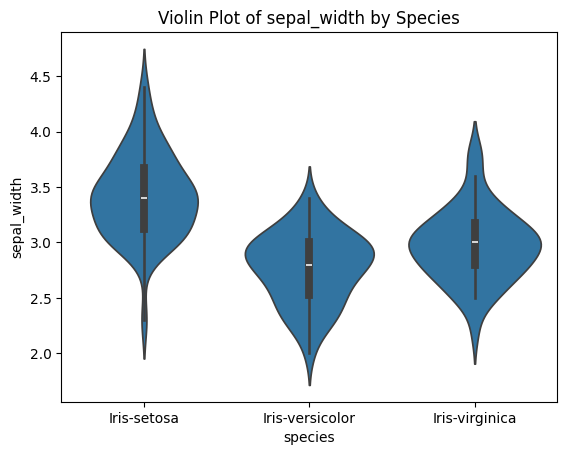

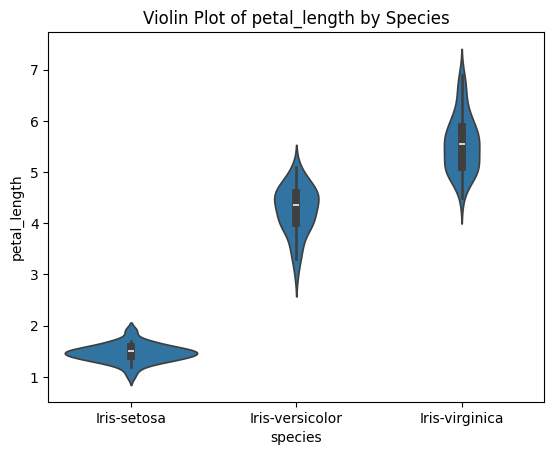

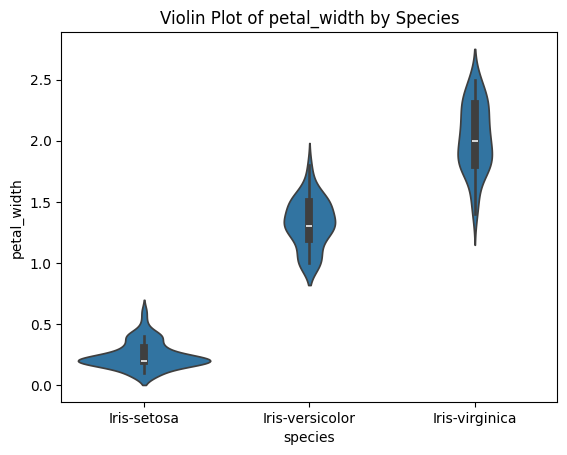

In [107]:
plt.figure(figsize=(10, 8))
# Select numerical columns
numeric_columns = iris.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    sns.violinplot(x='species', y=column, data=iris)
    plt.title(f'Violin Plot of {column} by Species')
    plt.show()

**Comparison:** By comparing the violins for different species (e.g., Iris-setosa, Iris-versicolor, Iris-virginica), you can see how their distributions of sepal length differ. For instance, if one species has a significantly shorter sepal length overall compared to others, it will be reflected in the violin plot.

**Density:** The height and width of the violin show the density and range of sepal length values. Higher and broader sections indicate more data points in those ranges.

**Shape:** If the violin plot for a species is narrow, it indicates that most values of sepal length for that species are concentrated around a particular value. A wider plot suggests more variability in sepal length.

In [108]:
# Select numerical columns
numeric_columns = iris.select_dtypes(include=['int64', 'float64']).columns

# Calculate Pearson's correlation coefficient for pairs of numerical features
for i, feature1 in enumerate(numeric_columns):
    for feature2 in numeric_columns[i + 1:]:
        corr_coefficient, p_value = pearsonr(iris[feature1], iris[feature2])
        print(f"Pearson's correlation coefficient between {feature1} and {feature2}: {corr_coefficient:.2f}")

Pearson's correlation coefficient between sepal_length and sepal_width: -0.11
Pearson's correlation coefficient between sepal_length and petal_length: 0.87
Pearson's correlation coefficient between sepal_length and petal_width: 0.82
Pearson's correlation coefficient between sepal_width and petal_length: -0.42
Pearson's correlation coefficient between sepal_width and petal_width: -0.36
Pearson's correlation coefficient between petal_length and petal_width: 0.96


In [109]:
iris['sepal_length_width_interaction'] = iris['sepal_width'] * iris['sepal_width']
iris['sepal_length_petal_length_interaction'] = iris['sepal_width'] * iris['petal_length']
iris['sepal_length_petal_width_interaction'] = iris['sepal_width'] * iris['petal_width']
iris['sepal_width_petal_length_interaction'] = iris['sepal_width'] * iris['petal_length']
iris['sepal_width_petal_width_interaction'] = iris['sepal_width'] * iris['petal_width']
iris['petal_length_width_interaction'] = iris['petal_length'] * iris['petal_width']

In [110]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_width_interaction,sepal_length_petal_length_interaction,sepal_length_petal_width_interaction,sepal_width_petal_length_interaction,sepal_width_petal_width_interaction,petal_length_width_interaction
0,5.1,3.5,1.4,0.2,Iris-setosa,12.25,4.90,0.70,4.90,0.70,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,9.00,4.20,0.60,4.20,0.60,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,10.24,4.16,0.64,4.16,0.64,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,9.61,4.65,0.62,4.65,0.62,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,12.96,5.04,0.72,5.04,0.72,0.28


Creating interaction terms in a dataset, such as those in the Iris dataset, can be helpful in several ways in the context of data analysis and modeling:

**1. Capture Non-linear Relationships:** Interaction terms allow models to capture non-linear relationships between variables that are not adequately represented by individual features alone. For example, the combined effect of sepal length and petal length might differ significantly from the sum of their individual effects.

**2. Enhance Model Flexibility:** By introducing interaction terms, you increase the flexibility of the model to better fit the data. This can lead to improved model performance and predictive accuracy, especially when the relationship between predictors and the target variable is complex.

**3. Improve Predictive Power:** nteraction terms can potentially improve the predictive power of the model by providing additional information about how features interact to influence the outcome. This is particularly useful in cases where the relationships are synergistic or antagonistic.

**4. Domain Insights:** Interaction terms can provide insights into how different variables interact in the context of the problem domain. This can lead to a deeper understanding of the underlying mechanisms driving the relationships between variables.

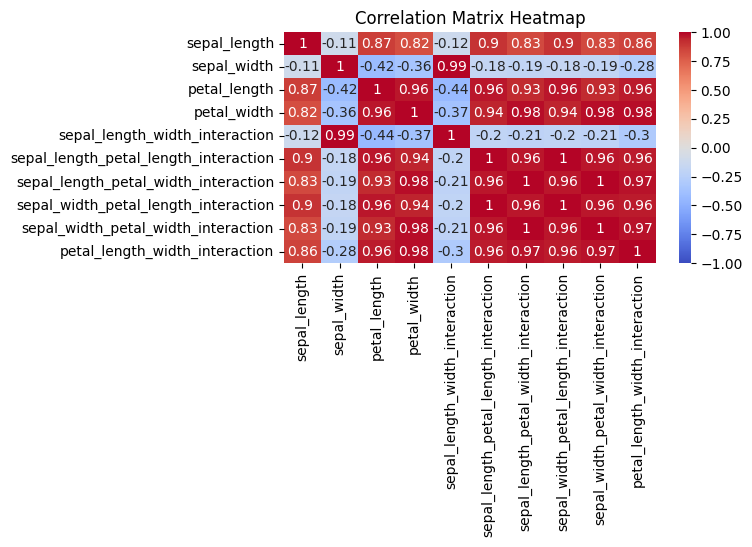

In [111]:
# Select numerical columns
numerical_columns = iris.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data Cleaning

## Handling Outliers

To Remove outliers from the data we use winsorize method.Cap the extreme values by replacing them with a specified percentile value (e.g., 95th percentile).

In [112]:
iris['sepal_width_winsorized'] = winsorize(iris['sepal_width'], limits=[0.05, 0.05])
iris['sepal_Length_Width_Interaction_Win'] = winsorize(iris['sepal_length_width_interaction'], limits=[0.05, 0.05])

In [113]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_width_interaction,sepal_length_petal_length_interaction,sepal_length_petal_width_interaction,sepal_width_petal_length_interaction,sepal_width_petal_width_interaction,petal_length_width_interaction,sepal_width_winsorized,sepal_Length_Width_Interaction_Win
0,5.1,3.5,1.4,0.2,Iris-setosa,12.25,4.90,0.70,4.90,0.70,0.28,3.5,12.25
1,4.9,3.0,1.4,0.2,Iris-setosa,9.00,4.20,0.60,4.20,0.60,0.28,3.0,9.00
2,4.7,3.2,1.3,0.2,Iris-setosa,10.24,4.16,0.64,4.16,0.64,0.26,3.2,10.24
3,4.6,3.1,1.5,0.2,Iris-setosa,9.61,4.65,0.62,4.65,0.62,0.30,3.1,9.61
4,5.0,3.6,1.4,0.2,Iris-setosa,12.96,5.04,0.72,5.04,0.72,0.28,3.6,12.96


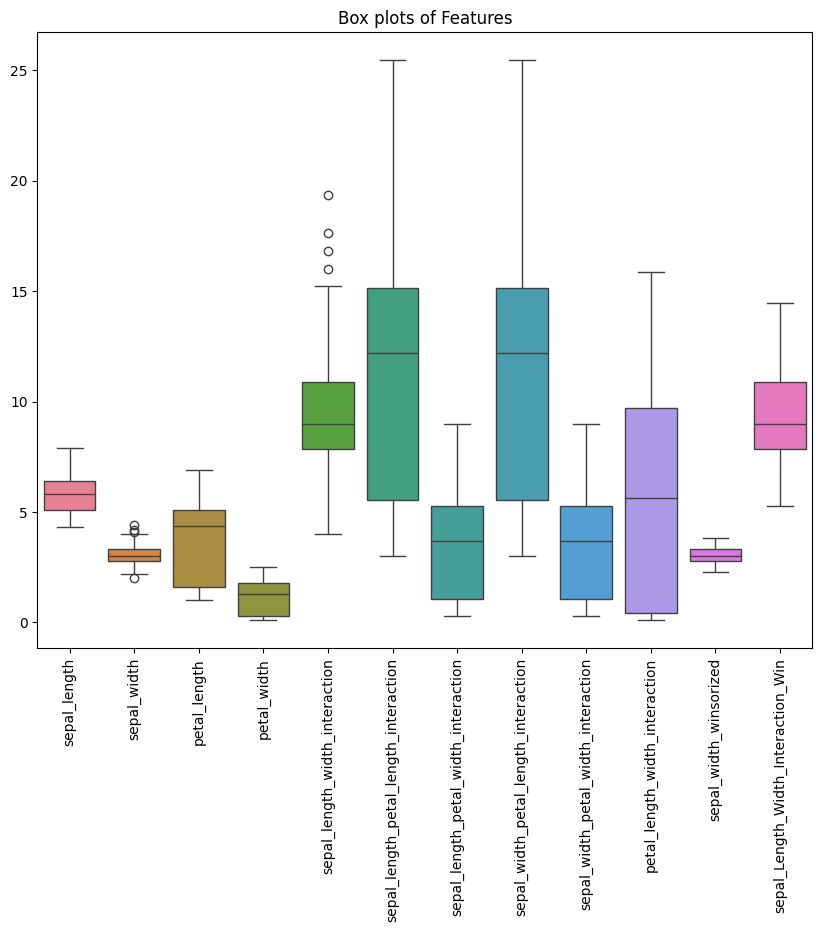

In [114]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris)
plt.title('Box plots of Features')
plt.xticks(rotation=90)
plt.show()

## Removing redundant or irrelevant features

In [115]:
X = iris.drop('species', axis=1)
y=iris['species']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature importances:\n", feature_importances)

Feature importances:
 sepal_length                             0.024777
sepal_width                              0.004648
petal_length                             0.112501
petal_width                              0.173199
sepal_length_width_interaction           0.006903
sepal_length_petal_length_interaction    0.108310
sepal_length_petal_width_interaction     0.094022
sepal_width_petal_length_interaction     0.087711
sepal_width_petal_width_interaction      0.107189
petal_length_width_interaction           0.264706
sepal_width_winsorized                   0.007862
sepal_Length_Width_Interaction_Win       0.008171
dtype: float64


From the above feature importance scores we can say that petal_length, petal_width, sepal_length_petal_width_interaction,
sepal_width_petal_length_interaction,
sepal_width_petal_width_interaction,
petal_length_width_interaction are more influential in predicting the target variable. These features capture more variance or information about the target in the dataset.

Features with lower or near-zero importance scores contribute less to the predictive power of the model. These features may potentially be candidates for removal, as they do not significantly enhance the model's ability to generalize. So we can drop the less features that have less feature importance score.

In [116]:
iris.drop(['sepal_length', 'sepal_width', 'sepal_width_winsorized','sepal_length_width_interaction', 'sepal_length_petal_length_interaction', 'sepal_Length_Width_Interaction_Win'], axis=1, inplace=True)

In [117]:
iris.head()

,petal_length,petal_width,species,sepal_length_petal_width_interaction,sepal_width_petal_length_interaction,sepal_width_petal_width_interaction,petal_length_width_interaction
0,1.4,0.2,Iris-setosa,0.70,4.90,0.70,0.28
1,1.4,0.2,Iris-setosa,0.60,4.20,0.60,0.28
2,1.3,0.2,Iris-setosa,0.64,4.16,0.64,0.26
3,1.5,0.2,Iris-setosa,0.62,4.65,0.62,0.30
4,1.4,0.2,Iris-setosa,0.72,5.04,0.72,0.28


## Data Transformation

In [118]:
iris.describe()

,petal_length,petal_width,sepal_length_petal_width_interaction,sepal_width_petal_length_interaction,sepal_width_petal_width_interaction,petal_length_width_interaction
count,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000
mean,3.758667,1.198667,3.543533,11.15940,3.543533,5.793133
std,1.764420,0.763161,2.335223,5.24078,2.335223,4.713499
min,1.000000,0.100000,0.300000,2.99000,0.300000,0.110000
25%,1.600000,0.300000,1.050000,5.56250,1.050000,0.420000
50%,4.350000,1.300000,3.695000,12.21500,3.695000,5.615000
75%,5.100000,1.800000,5.265000,15.15250,5.265000,9.690000
max,6.900000,2.500000,9.000000,25.46000,9.000000,15.870000


Since the values are in range no need of normalization or standardization



## Skewness of a column

**1.Positive Skew (Right-skewed):** In a positively skewed distribution, the tail of the distribution extends towards the right, meaning that the majority of the data points are concentrated on the left side of the distribution.
The mean is typically greater than the median in a positively skewed distribution because the few larger values on the right pull the mean in that direction.

**2.Negative Skew (Left-skewed):** In a negatively skewed distribution, the tail of the distribution extends towards the left, indicating that the majority of the data points are concentrated on the right side of the distribution.
The mean is typically less than the median in a negatively skewed distribution because the few smaller values on the left pull the mean in that direction.

**When to Apply Logarithm for positive skewness:** 

Highly Skewed Data: If your data is highly positively skewed (skewness > 1 or even > 0.5), applying a logarithmic transformation can help make the distribution more symmetric.

Linear Relationships: In some cases, a logarithmic transformation is used to stabilize variance and improve the linearity of relationships between variables in statistical modeling.

**when to apply Logarithm for negative skewness:**

Rarely for Negative Skew: Negative skewness (skewness < -1 or even < -0.5) indicates a long tail on the left side of the distribution. It's less common to apply a logarithmic transformation directly to reduce negative skewness because logarithms naturally compress values towards zero.

Alternative Transformations: For negatively skewed data, consider other transformations like square root (np.sqrt()) or cube root (np.cbrt()), depending on the specific characteristics of your data.

**Considerations:**

***Data Interpretation:*** After applying a logarithmic transformation, remember to interpret results in the transformed scale (logarithmic scale) rather than the original scale.

**Handling Zeros and Negative Values:** Ensure your data does not contain zeros or negative values that would cause errors when applying the logarithm. Use transformations like np.log1p() which handle zeros gracefully (log(1 + x)).

In [119]:
numerical_columns = iris.select_dtypes(include=['int64', 'float64'])
skewness = numerical_columns.skew()
print("Skewness of each column:")
print(skewness)

Skewness of each column:
petal_length                           -0.274464
petal_width                            -0.104997
sepal_length_petal_width_interaction    0.227346
sepal_width_petal_length_interaction    0.171435
sepal_width_petal_width_interaction     0.227346
petal_length_width_interaction          0.266638
dtype: float64


Since the skewness values are not too long no need to apply log

## Model Selection And Training

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'--- {model_name} ---')
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print()

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--- Decision Tree ---
Accuracy: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--

In [123]:
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    print(f'--- {model_name} ---')
    print(f'Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}')

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

--- Logistic Regression ---
Cross-Validation Accuracy: 0.97 ± 0.03
--- Decision Tree ---
Cross-Validation Accuracy: 0.93 ± 0.04
--- K-Nearest Neighbors ---
Cross-Validation Accuracy: 0.95 ± 0.03
--- SVM ---
Cross-Validation Accuracy: 0.96 ± 0.02
--- Random Forest ---
Cross-Validation Accuracy: 0.96 ± 0.02


From the cross validation score logistic regression is the best model for the iris dataset.
